Tarefa Lançamento de projétil - ZERO DE FUNÇÕES

Luiza Dementshuk da Silva

MetCompA- Turma B

Cartão 00316060

Tarefa:
1. Construa um gráfico de f(θ) em função de θ usando a equação:

$ f(ϴ)=\frac{v_0cos(θ)}{g}[v_0sen(ϴ)+ \sqrt{v_0²sen²(θ) + 2gy_o}]  $

2. Utilize um dos métodos vistos em aula para determinar os valores de θ
que correspondem aos zeros dessa fun¸c˜ao, ou seja, onde a fun¸c˜ao cruza o
eixo das abscissas.


O método escolhido foi o Método da Secante, tal que x é o valor mais aproximado do ângulo no qual a função é zero, dentro de uma tolerância de $1\times 10^{-8}$:

 $ x = a - \frac{(b-a)}{f(b) - f(a)}\times f(a) $ 

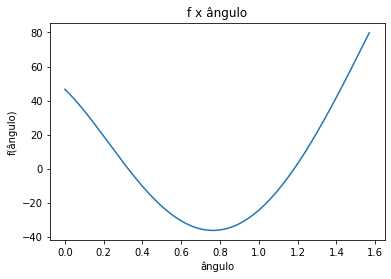

O ângulo, em rad é 0.3257379204009022 e o valor da função é -2.1117330106790178e-11
O ângulo, em rad é 1.1826395963846115 e o valor da função é -2.232667384305387e-09


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


def funcao(ang):
  sen = np.sin(ang)
  cos = np.cos(ang)
  x = 80 
  v0 = 120/3.6
  y0 = 5
  g = 9.98

  f = (x - (((v0 * cos)/g)*((v0 * sen) + (math.sqrt((v0**2)*(sen**2) + (2*g*y0))))))

  return f

def plot_f_ang():
  res = []
  ang = np.arange(0, np.pi/2, 0.01)
  for i in ang:
    res.append(funcao(i))

  plt.plot(ang, res)
  plt.title('f x ângulo')
  plt.xlabel('ângulo')
  plt.ylabel('f(ângulo)')
  plt.show()

  return res

def secante(a, b, tol=1e-8):
  x = a - funcao(a)*(b-a)/(funcao(b) - funcao(a))

  while abs(funcao(x)) > tol:
    
    if abs(a-x) > abs(b-x):
      a = b
      b = x
    else:
      b = a
      a = x
      
    x = a - funcao(a)*(b-a)/(funcao(b) - funcao(a))

  print(f'O ângulo, em rad é {x} e o valor da função é {funcao(x)}')

  return x

# --------------- MAIN ---------------- #

res = plot_f_ang()
ang_zero1 = secante(0.2, 0.6)
ang_zero2 = secante(1., 1.2)


Tarefa:

3. Para cada um dos ângulos θ, grafique a correspondente trajetória do
projétil, y(t) × x(t). 

A equação para determinar o
tempo no qual o projétil atinge o alvo é:

$ t=\frac{1}{g}[v_0sen(ϴ)+ \sqrt{v_0²sen²(θ) + 2gy_o}] $

Coloque as duas trajetórias em uma mesma figura, indicando na legenda do gráfico qual o valor de θ cada trajetória corresponde.

A equação da posição horizontal é:

$ x = v_0cos(ϴ)t $

E a equação da posição vertical é:

$ y = y_0 + v_0sen(θ)t-\frac{1}{2} gt^2 $

O ângulo, em rad é 0.3257379204009022 e o valor da função é -2.1117330106790178e-11
O ângulo, em rad é 1.1826395963846115 e o valor da função é -2.232667384305387e-09
-> O tempo em que o projétil demora para atingir o solo no angulo 0.33rad é 2.53s
-> O tempo em que o projétil demora para atingir o solo no angulo 0.33rad é 2.53s
-> O tempo em que o projétil demora para atingir o solo no angulo 1.18rad é 6.34s
-> O tempo em que o projétil demora para atingir o solo no angulo 1.18rad é 6.34s


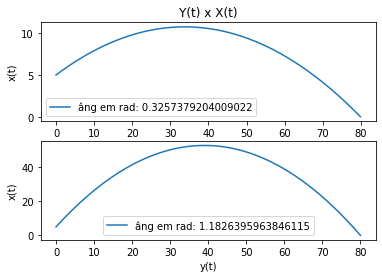

In [ ]:
def tempo(ang):
  sen = np.sin(ang)
  cos = np.cos(ang)
  x = 80 
  v0 = 120/3.6
  y0 = 5
  g = 9.98

  t = (1/g) *( (v0*sen)+((math.sqrt((v0**2)*(sen**2) + (2*g*y0)))))
  print(f'-> O tempo em que o projétil demora para atingir o solo no angulo {ang :.2f}rad é {t :.2f}s')

  return t

def posicao_x(ang):
  t = tempo(ang)
  dt = np.arange(0,t,0.01)
  v0 = 120/3.6
  cos = np.cos(ang)
  x = []
  for i in dt:
    x.append(v0*cos*i)
  
  return x

def posicao_y(ang):
  t = tempo(ang)
  dt = np.arange(0,t,0.01)
  v0 = 120/3.6
  sen = np.sin(ang)
  y0 = 5
  g = 9.98
  y = []
  for i in dt:
    y.append(y0 + ((v0*sen*i) - (g*(i**2)/2)))

  return y

def plot_x_y(ang1, ang2):

  x = posicao_x(ang1)
  y = posicao_y(ang1)

  plt.figure(1)

  plt.subplot(211)
  plt.plot(x, y)
  plt.legend([f'âng em rad: {ang1}'])
  plt.title('Y(t) x X(t)')
  plt.xlabel('y(t)')
  plt.ylabel('x(t)')

  x = posicao_x(ang2)
  y = posicao_y(ang2)
  plt.subplot(212)
  plt.plot(x, y)
  plt.legend([f'âng em rad: {ang2}'])
  plt.xlabel('y(t)')
  plt.ylabel('x(t)')

  plt.show()


# ------------ MAIN ------------ #
ang_zero1 = secante(0.2, 0.6)
ang_zero2 = secante(1., 1.2)
plot_x_y(ang_zero1, ang_zero2)